IndexError: list index out of range

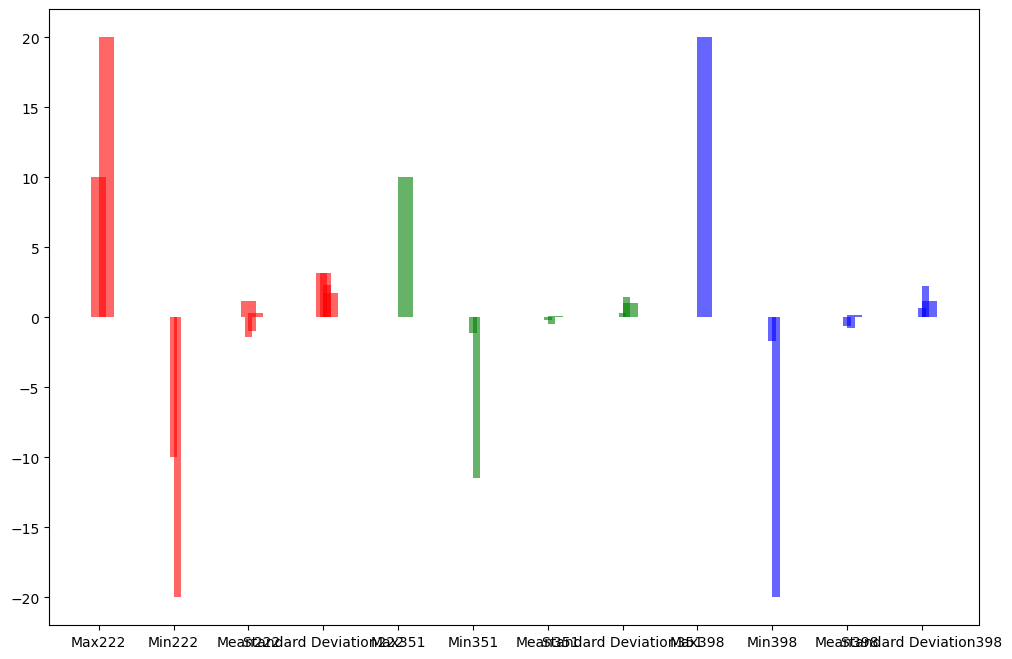

In [5]:
# [Reformatted with indexing and image output]
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of seeds used in the experiments
seeds = [222, 351, 398, 453, 545, 580, 752, 827, 841, 983]  # Update this list with the seeds you employed

# Function to load data for each seed, given the directory and algorithm
def load_data_for_seed(seed, algorithm_directory):
    evaluation_file = os.path.join(algorithm_directory, f'evaluation_data_{seed}.csv')
    training_file = os.path.join(algorithm_directory, f'training_data_{seed}.csv')
    evaluation_data = pd.read_csv(evaluation_file)
    training_data = pd.read_csv(training_file)
    return evaluation_data, training_data

# Function to separate adversaries and agents
def separate_adversaries_and_agents(data):
    adversaries = data[data['Agent'].str.contains('adversary')]
    agents = data[data['Agent'].str.contains('agent')]
    return adversaries, agents

# Function to calculate statistics
def calculate_statistics(rewards):
    return {
        'Max': rewards.max(),
        'Min': rewards.min(),
        'Mean': rewards.mean(),
        'Standard Deviation': rewards.std()
    }

# Directories for both DQN and MADDPG algorithms
dqn_directory = '//Users/Niklas/Library/CloudStorage/OneDrive-tukl/TU KL/02_Master/10. Fachsemester/[4.5 LP] Multiagent Systems/Programming Task/Konzept/project/Results/True/data_exportDQN'  # Update this with the DQN directory path
maddpg_directory = '/Users/Niklas/Library/CloudStorage/OneDrive-tukl/TU KL/02_Master/10. Fachsemester/[4.5 LP] Multiagent Systems/Programming Task/Konzept/project/Results/True/data_exportMADDPG'  # Update this with the MADDPG directory path

# Output directory for saving plots
output_directory = 'output_plots'  # Update this with your desired output directory path
os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Algorithms to compare
algorithms = {
    'DQN': dqn_directory,
    'MADDPG': maddpg_directory
}

# Plot setup
width = 0.2  # Bar width for each seed
colors = ['r', 'g', 'b']  # Colors for different seeds

# Loop through each algorithm and seed to process and plot data
for algorithm, algorithm_directory in algorithms.items():
    plt.figure(figsize=(12, 8))
    
    for i, seed in enumerate(seeds):
        # Load the data for this seed
        evaluation_data, training_data = load_data_for_seed(seed, algorithm_directory)

        # Separate adversaries and agents for evaluation and training data
        evaluation_adversaries, evaluation_agents = separate_adversaries_and_agents(evaluation_data)
        training_adversaries, training_agents = separate_adversaries_and_agents(training_data)

        # Extract the 'reward' column for adversaries and agents
        evaluation_adversary_rewards = evaluation_adversaries['Reward']
        evaluation_agent_rewards = evaluation_agents['Reward']
        training_adversary_rewards = training_adversaries['Reward']
        training_agent_rewards = training_agents['Reward']

        # Calculate statistics
        evaluation_adversary_stats = calculate_statistics(evaluation_adversary_rewards)
        evaluation_agent_stats = calculate_statistics(evaluation_agent_rewards)
        training_adversary_stats = calculate_statistics(training_adversary_rewards)
        training_agent_stats = calculate_statistics(training_agent_rewards)

        # Create the labels for the graph
        labels = ['Max', 'Min', 'Mean', 'Standard Deviation']

        # Input data for plotting
        evaluation_adversary_values = [evaluation_adversary_stats[label] for label in labels]
        evaluation_agent_values = [evaluation_agent_stats[label] for label in labels]
        training_adversary_values = [training_adversary_stats[label] for label in labels]
        training_agent_values = [training_agent_stats[label] for label in labels]

        # Offset for each seed to avoid overlap of bars
        x_offset = i * width

        # Bar diagrams for evaluation data
        plt.bar([label + str(seed) for label in labels], 
                evaluation_adversary_values, 
                alpha=0.6, color=colors[i], 
                label=f'Evaluation Adversaries (Seed {seed})', 
                width=width, align='center')
        plt.bar([label + str(seed) for label in labels], 
                evaluation_agent_values, 
                alpha=0.6, color=colors[i], 
                label=f'Evaluation Agents (Seed {seed})', 
                width=width/2, align='center')

        # Bar diagrams for training data
        plt.bar([label + str(seed) for label in labels], 
                training_adversary_values, 
                alpha=0.6, color=colors[i], 
                label=f'Training Adversaries (Seed {seed})', 
                width=width, align='edge')
        plt.bar([label + str(seed) for label in labels], 
                training_agent_values, 
                alpha=0.6, color=colors[i], 
                label=f'Training Agents (Seed {seed})', 
                width=width/2, align='edge')

    # Plotting settings
    plt.title(f'Statistical Comparison of Rewards for ({algorithm}) Across Seeds (Adversaries vs Agents)')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
    
    # Save the comparison plot
    plt.savefig(os.path.join(output_directory, f'{algorithm}_Statistical_Comparison_of_Rewards.png'))
    plt.close()  # Close the figure to free up memory

Evaluation Adversary Statistics: {'Max': 10.0, 'Min': 0.0, 'Mean': 0.03205128205128205, 'Standard Deviation': 0.5655326971908307}
Evaluation Agent Statistics: {'Max': 0.0, 'Min': -11.932043139246456, 'Mean': -1.683230025328881, 'Standard Deviation': 2.962706902062109}
Training Adversary Statistics: {'Max': 10.0, 'Min': 0.0, 'Mean': 0.08241758241758242, 'Standard Deviation': 0.904506700778322}
Training Agent Statistics: {'Max': 0.0, 'Min': -10.0, 'Mean': -0.41982939639278494, 'Standard Deviation': 1.1016619677068429}


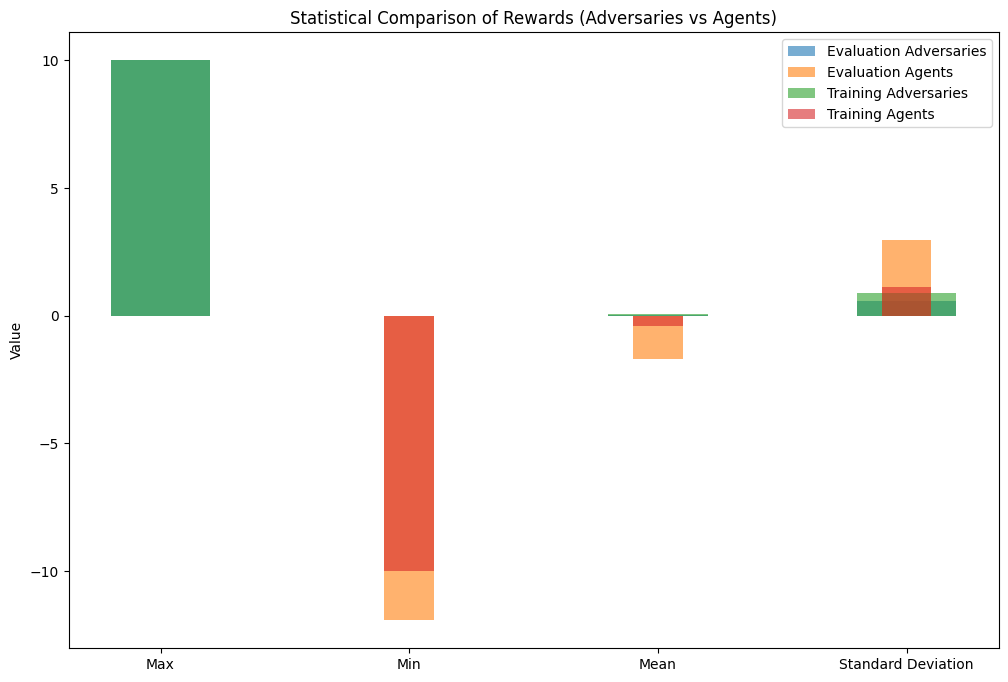

In [ ]:
# [Original] Comparing adversaries versus agent_0 in terms of min. and max. reward, mean and standard deviation of the rewards for each episode
import pandas as pd
import matplotlib.pyplot as plt

# Load data
evaluation_data = pd.read_csv('DQN/evaluation_data.csv')
training_data = pd.read_csv('DQN/training_data.csv')

# Filter adversaries and agents 
def separate_adversaries_and_agents(data):
    adversaries = data[data['Agent'].str.contains('adversary')]
    agents = data[data['Agent'].str.contains('agent')]
    return adversaries, agents

evaluation_adversaries, evaluation_agents = separate_adversaries_and_agents(evaluation_data)
training_adversaries, training_agents = separate_adversaries_and_agents(training_data)

# Extract the 'reward' column for adversaries and agents
evaluation_adversary_rewards = evaluation_adversaries['Reward']
evaluation_agent_rewards = evaluation_agents['Reward']
training_adversary_rewards = training_adversaries['Reward']
training_agent_rewards = training_agents['Reward']

# Metric calculation for rewards
def calculate_statistics(rewards):
    return {
        'Max': rewards.max(),
        'Min': rewards.min(),
        'Mean': rewards.mean(),
        'Standard Deviation': rewards.std()
    }

evaluation_adversary_stats = calculate_statistics(evaluation_adversary_rewards)
evaluation_agent_stats = calculate_statistics(evaluation_agent_rewards)
training_adversary_stats = calculate_statistics(training_adversary_rewards)
training_agent_stats = calculate_statistics(training_agent_rewards)

# Output the necessary data
print("Evaluation Adversary Statistics:", evaluation_adversary_stats)
print("Evaluation Agent Statistics:", evaluation_agent_stats)
print("Training Adversary Statistics:", training_adversary_stats)
print("Training Agent Statistics:", training_agent_stats)

# Create the labels for the graph
labels = ['Max', 'Min', 'Mean', 'Standard Deviation']

# Input data for plotting
evaluation_adversary_values = [evaluation_adversary_stats[label] for label in labels]
evaluation_agent_values = [evaluation_agent_stats[label] for label in labels]
training_adversary_values = [training_adversary_stats[label] for label in labels]
training_agent_values = [training_agent_stats[label] for label in labels]

# Create plot 
plt.figure(figsize=(12, 8))

# Bar diagrams for evaluation data
plt.bar(labels, evaluation_adversary_values, alpha=0.6, label='Evaluation Adversaries', width=0.4)
plt.bar(labels, evaluation_agent_values, alpha=0.6, label='Evaluation Agents', width=0.2)

# Bar diagrams for training data
plt.bar([label for label in labels], training_adversary_values, alpha=0.6, label='Training Adversaries', width=0.4)
plt.bar([label for label in labels], training_agent_values, alpha=0.6, label='Training Agents', width=0.2)

plt.title('Statistical Comparison of Rewards (Adversaries vs Agents)')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
# [Reformatted with indexing and image output]
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of seeds used in the experiments
seeds = [222, 351, 398, 453, 545, 580, 752, 827, 841, 983]  # Update this list with the seeds you employed

# Function to load data for each seed, given the directory
def load_data_for_seed(seed, algorithm_directory):
    evaluation_file = os.path.join(algorithm_directory, f'evaluation_data_{seed}.csv')
    training_file = os.path.join(algorithm_directory, f'training_data_{seed}.csv')
    evaluation_data = pd.read_csv(evaluation_file)
    training_data = pd.read_csv(training_file)
    return evaluation_data, training_data

# Function to separate adversaries and agents
def separate_adversaries_and_agents(data):
    adversaries = data[data['Agent'].str.contains('adversary')]
    agents = data[data['Agent'].str.contains('agent')]
    return adversaries, agents

# Directories for both DQN and MADDPG algorithms
dqn_directory = '/Results/True/data_exportDQN'  # Update this with the DQN directory path
maddpg_directory = '/Results/True/data_exportMADDPG'  # Update this with the MADDPG directory path

# Output directory for saving plots
output_directory = 'output_plots'  # Update this with your desired output directory path
os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Algorithms to compare
algorithms = {
    'DQN': dqn_directory,
    'MADDPG': maddpg_directory
}

# Loop through each algorithm and seed to process and plot data
for algorithm, algorithm_directory in algorithms.items():
    for seed in seeds:
        # Load the data for this seed
        evaluation_data, training_data = load_data_for_seed(seed, algorithm_directory)

        # Separate adversaries and agents for evaluation and training data
        evaluation_adversaries, evaluation_agents = separate_adversaries_and_agents(evaluation_data)
        training_adversaries, training_agents = separate_adversaries_and_agents(training_data)

        # Extract the 'reward' column for adversaries and agents
        evaluation_adversary_rewards = evaluation_adversaries['Reward']
        evaluation_agent_rewards = evaluation_agents['Reward']
        training_adversary_rewards = training_adversaries['Reward']
        training_agent_rewards = training_agents['Reward']

        # Use the index as x-axis
        evaluation_adversary_index = evaluation_adversaries.index
        evaluation_agent_index = evaluation_agents.index
        training_adversary_index = training_adversaries.index
        training_agent_index = training_agents.index

        # Plot for the adversary rewards
        plt.figure(figsize=(12, 6))

        # Plot for the adversary training rewards
        plt.plot(training_adversary_index, training_adversary_rewards,
                 label=f'{algorithm} Adversary Training Rewards (Seed {seed})', alpha=0.7)

        # Plot for the adversary evaluation rewards
        plt.plot(evaluation_adversary_index, evaluation_adversary_rewards,
                 label=f'{algorithm} Adversary Evaluation Rewards (Seed {seed})', alpha=0.7)

        plt.title(f'{algorithm} Adversary Rewards over Time (Seed {seed})')
        plt.xlabel('Index')
        plt.ylabel('Reward Value')
        plt.legend()
        plt.show()
        
        # Save the adversary rewards plot
        plt.savefig(os.path.join(output_directory, f'{algorithm}_Adversary_Rewards_Time_Seed_{seed}.png'))
        plt.close()  # Close the figure to free up memory

        # Plot for the agent rewards
        plt.figure(figsize=(12, 6))

        # Plot for the agent evaluation rewards
        plt.plot(evaluation_agent_index, evaluation_agent_rewards,
                 label=f'{algorithm} Agent Evaluation Rewards (Seed {seed})', alpha=0.7)

        # Plot for the agent training rewards
        plt.plot(training_agent_index, training_agent_rewards,
                 label=f'{algorithm} Agent Training Rewards (Seed {seed})', alpha=0.7)

        plt.title(f'{algorithm} Agent Rewards over Time (Seed {seed})')
        plt.xlabel('Index')
        plt.ylabel('Reward Value')
        plt.legend()
        plt.show()
        
        # Save the agent rewards plot
        plt.savefig(os.path.join(output_directory, f'{algorithm}_Agent_Rewards_Time_Seed_{seed}.png'))
        plt.close()  # Close the figure to free up memory

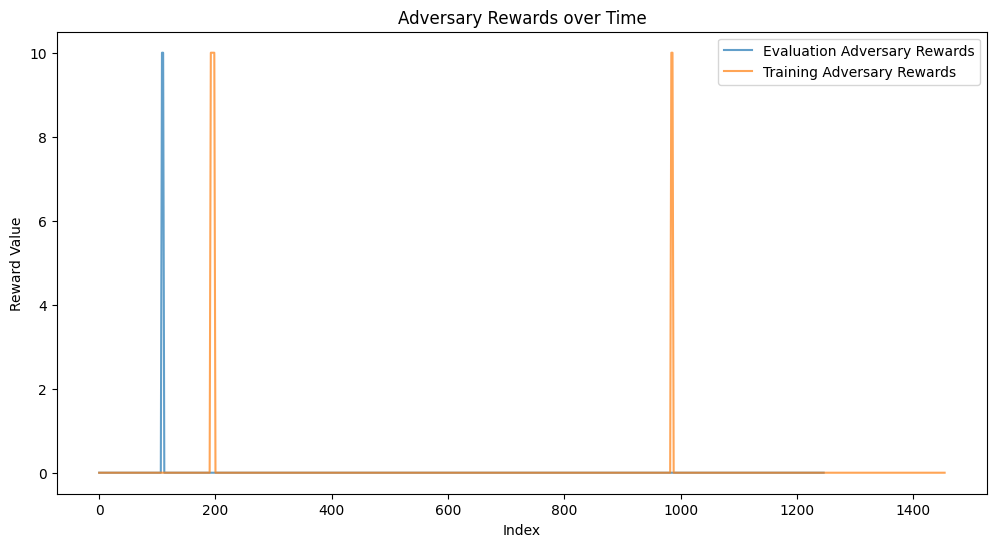

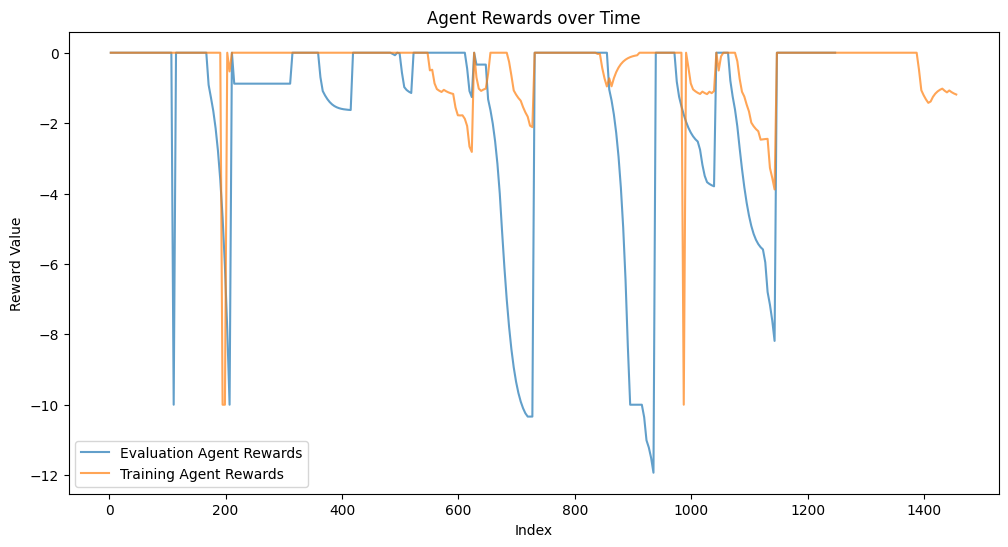

In [ ]:
# [Original] Represent average rewards with table index as time variable
# Load data
evaluation_data = pd.read_csv('data_exportDQN/evaluation_data.csv')
training_data = pd.read_csv('data_exportDQN/training_data.csv')

def separate_adversaries_and_agents(data):
    adversaries = data[data['Agent'].str.contains('adversary')]
    agents = data[data['Agent'].str.contains('agent')]
    return adversaries, agents

evaluation_adversaries, evaluation_agents = separate_adversaries_and_agents(evaluation_data)
training_adversaries, training_agents = separate_adversaries_and_agents(training_data)

# Extract the 'reward' column for adversaries and agents
evaluation_adversary_rewards = evaluation_adversaries['Reward']
evaluation_agent_rewards = evaluation_agents['Reward']
training_adversary_rewards = training_adversaries['Reward']
training_agent_rewards = training_agents['Reward']

# Plot for the adversary rewards 
plt.figure(figsize=(12, 6))

# Plot for the adversary training rewards
plt.plot(training_adversary_rewards, label='Adversary Training Rewards', alpha=0.7)

# Plot for the adversary training rewards
plt.plot(evaluation_adversary_rewards, label='Adversary Evaluation Rewards', alpha=0.7)

plt.title('Adversary Rewards over Time')
plt.xlabel('Index')
plt.ylabel('Reward Value')
plt.legend()
plt.show()

# Plot for the agent rewards 
plt.figure(figsize=(12, 6))

# Plot for the agent training rewards
plt.plot(training_agent_rewards, label='Agent Training Rewards', alpha=0.7)

# Plot for the agent evaluation rewards
plt.plot(evaluation_agent_rewards, label='Agent Evaluation Rewards', alpha=0.7)

plt.title('Agent Rewards over Time')
plt.xlabel('Index')
plt.ylabel('Reward Value')
plt.legend()
plt.show()

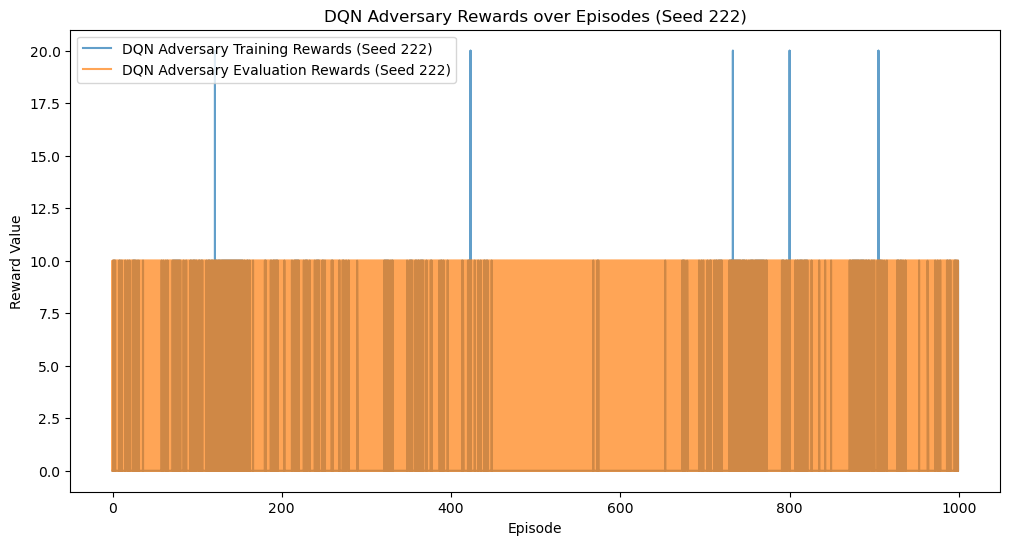

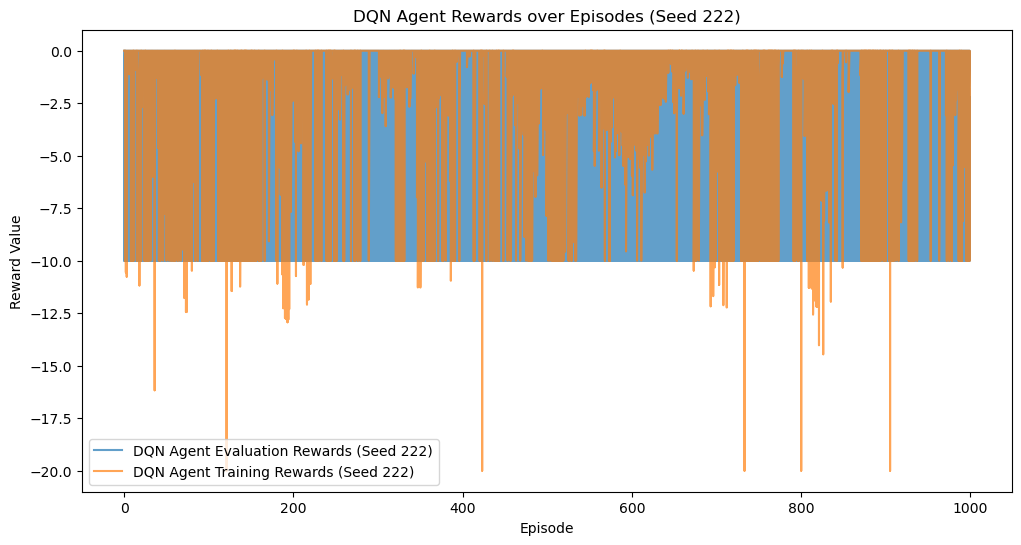

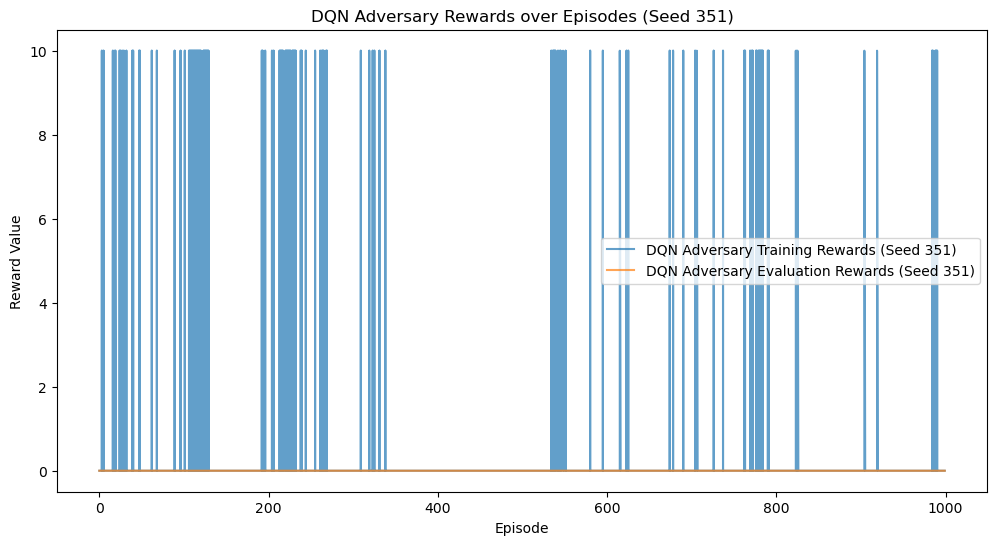

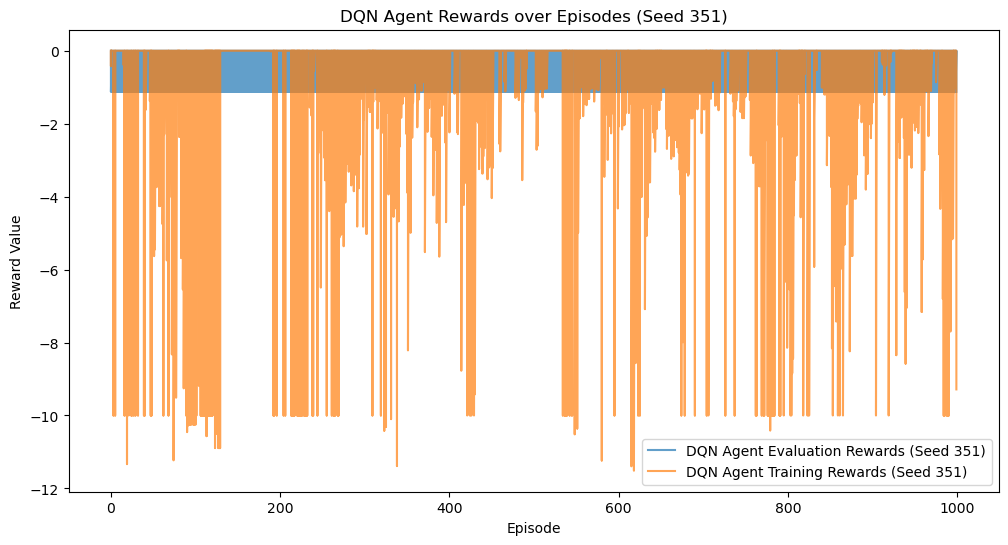

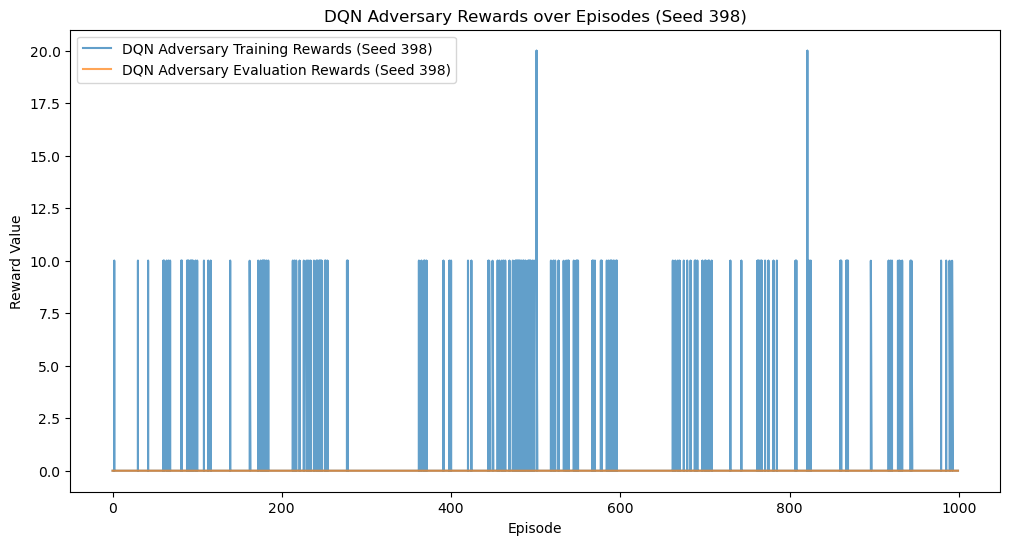

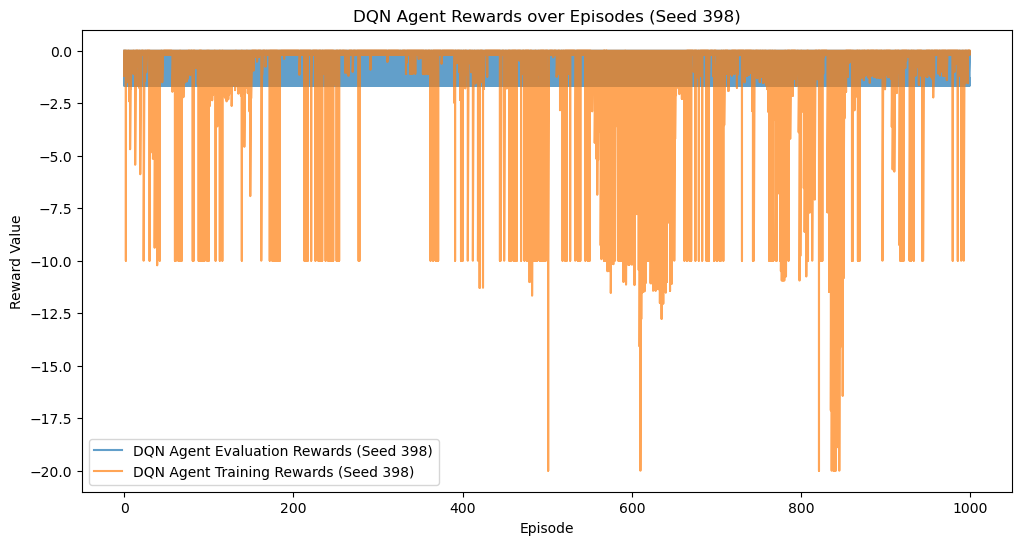

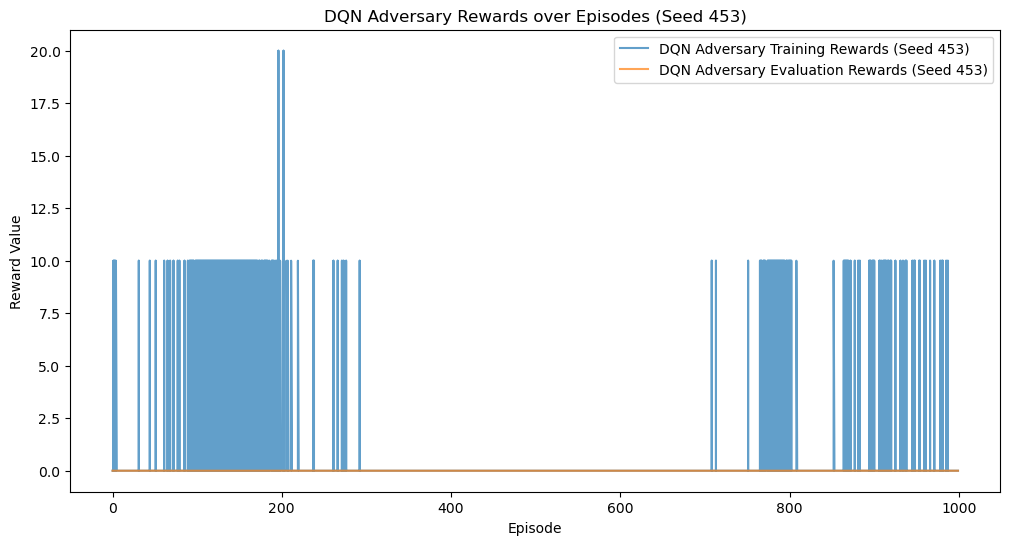

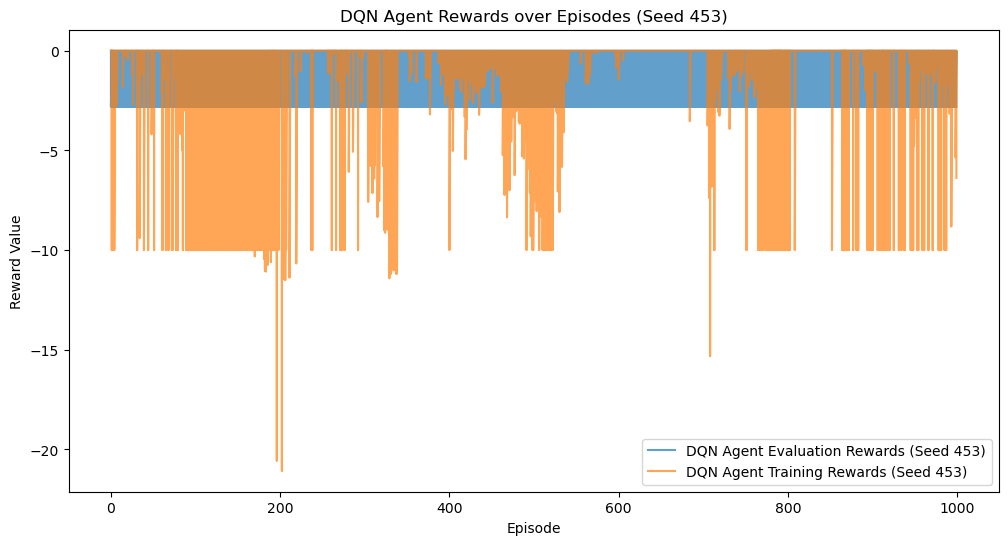

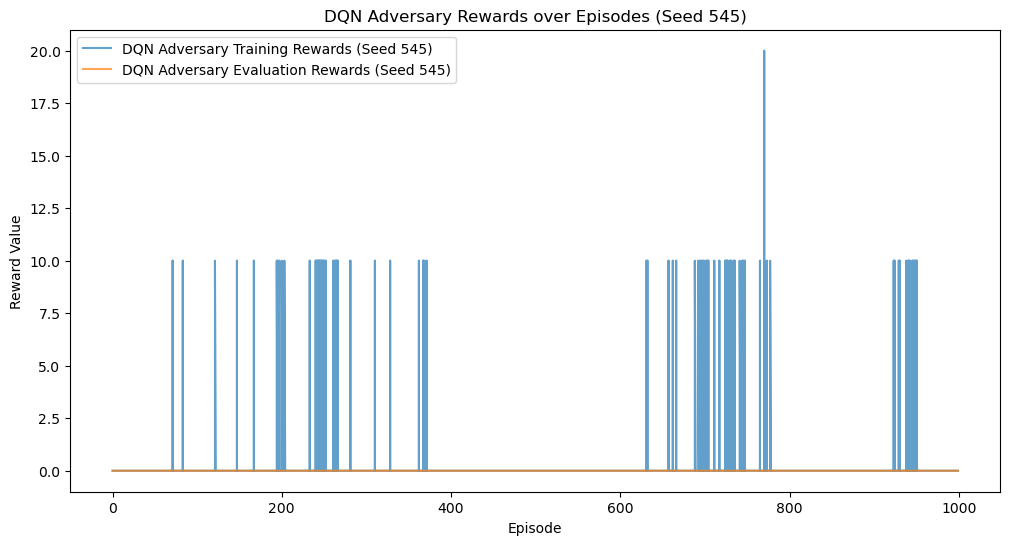

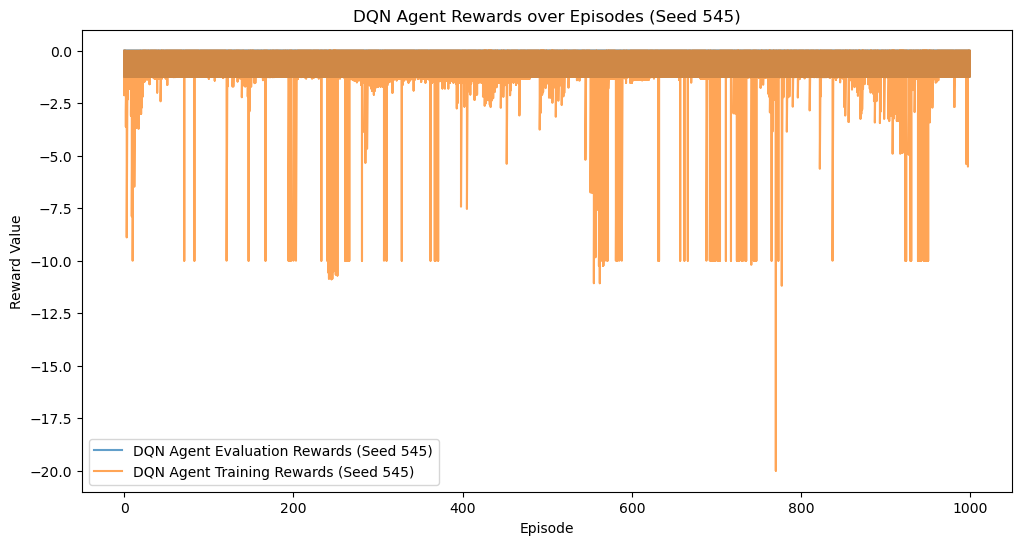

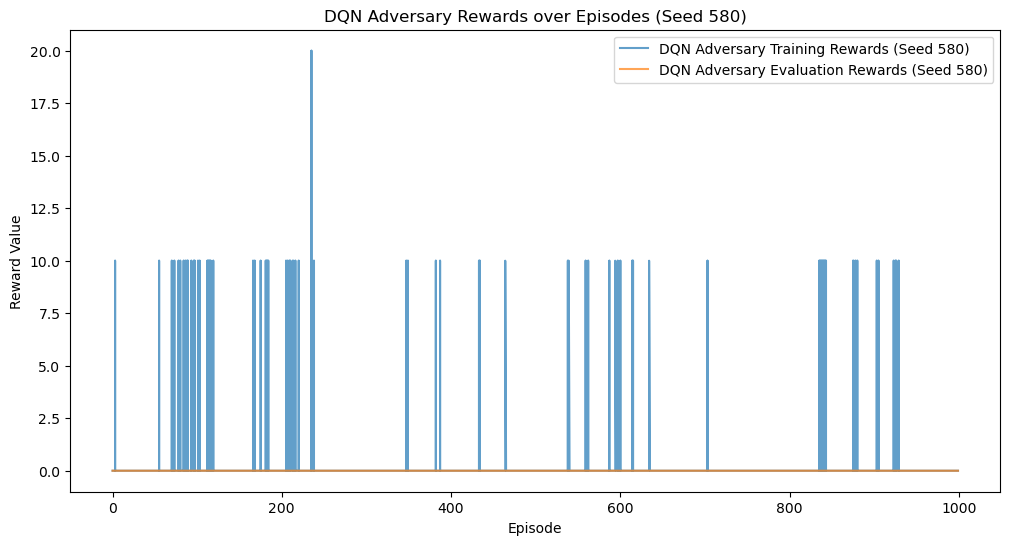

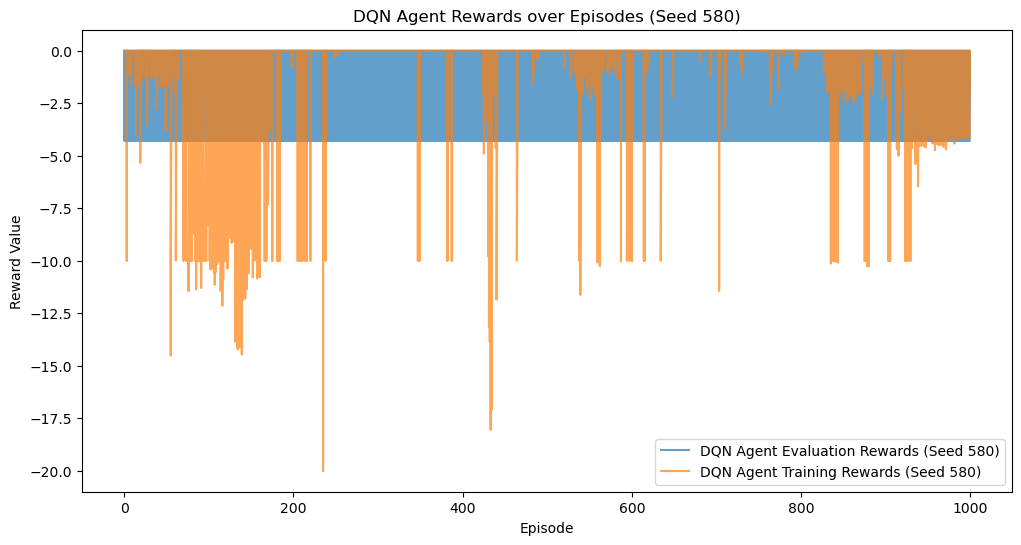

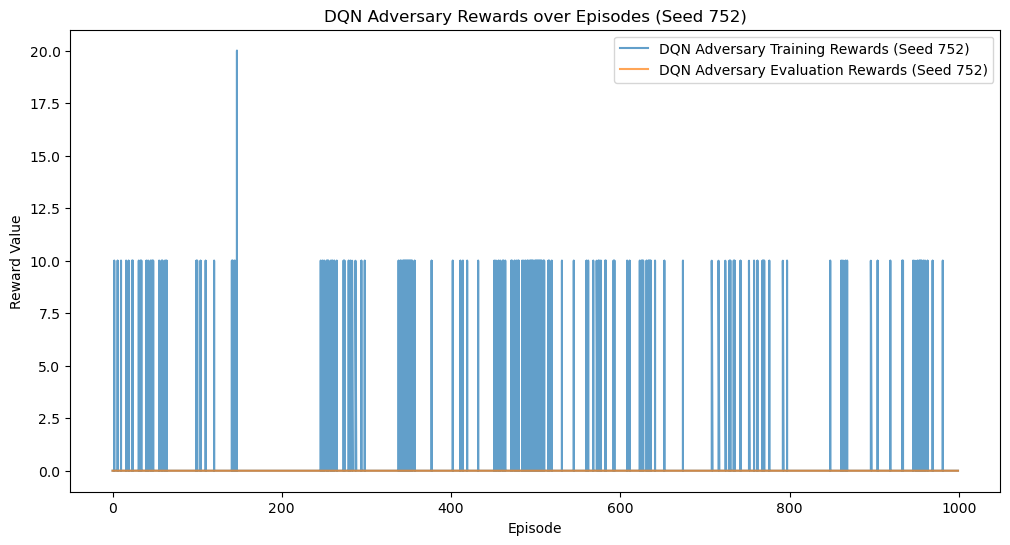

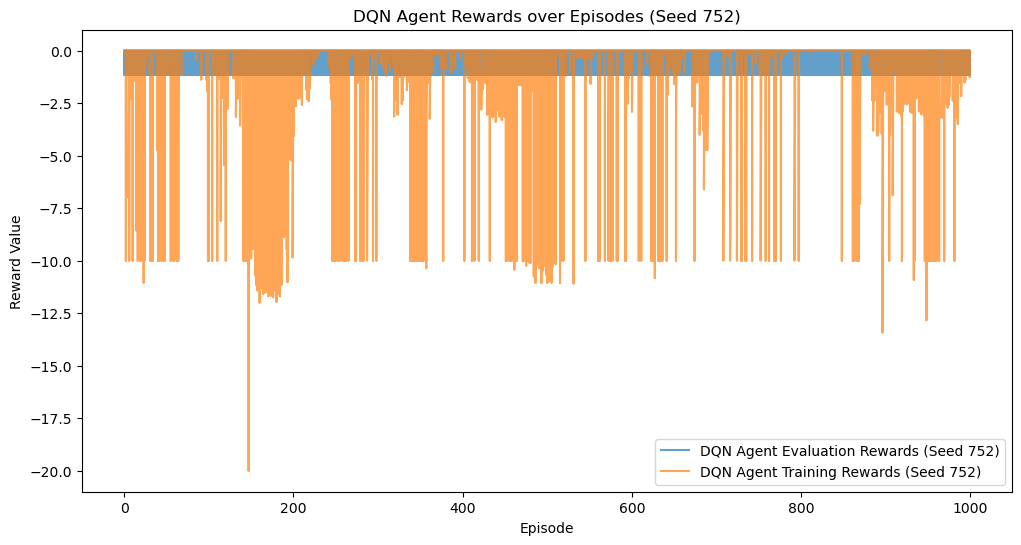

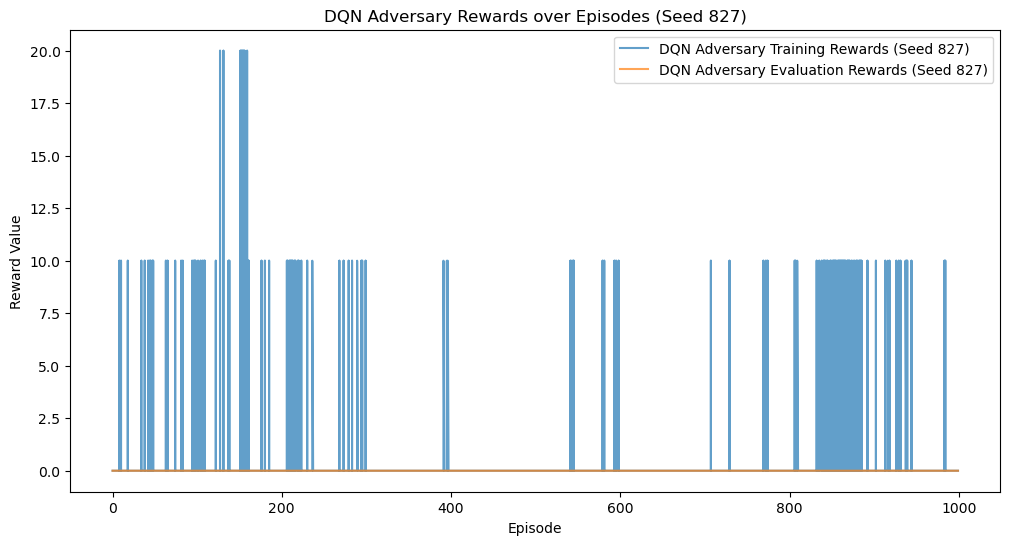

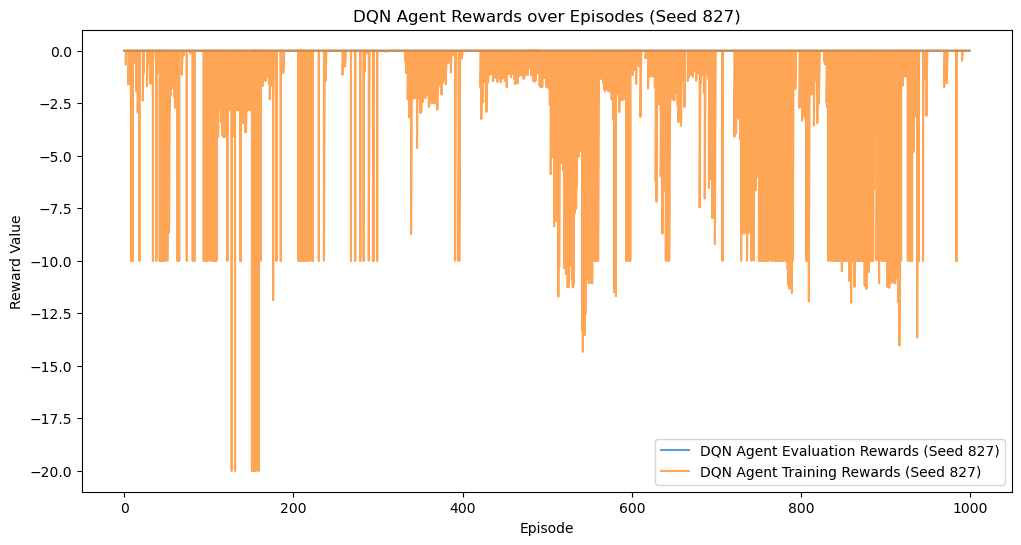

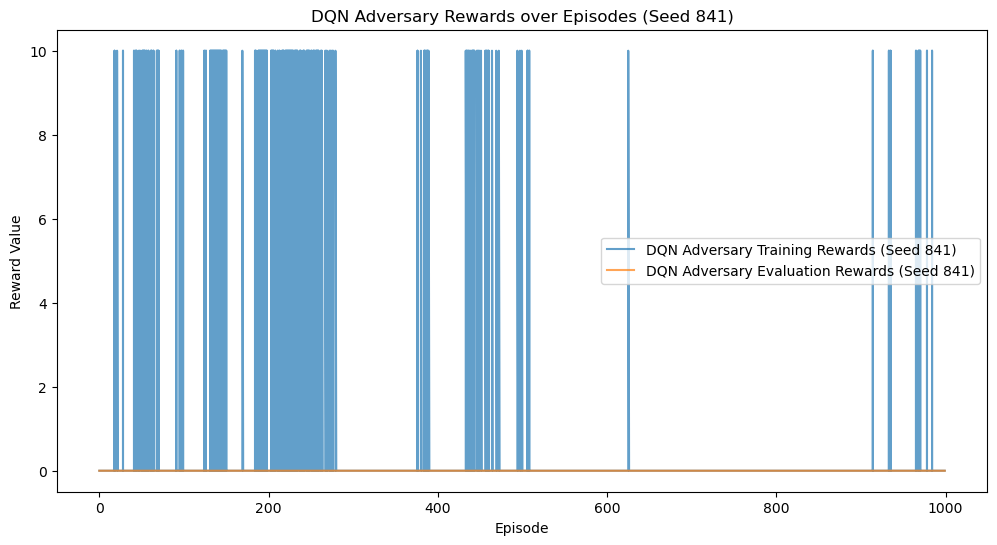

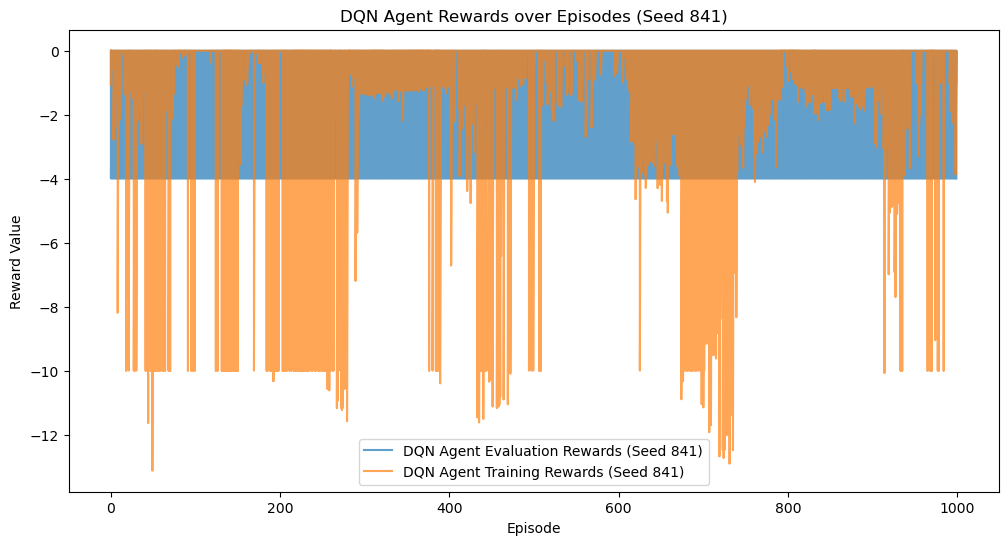

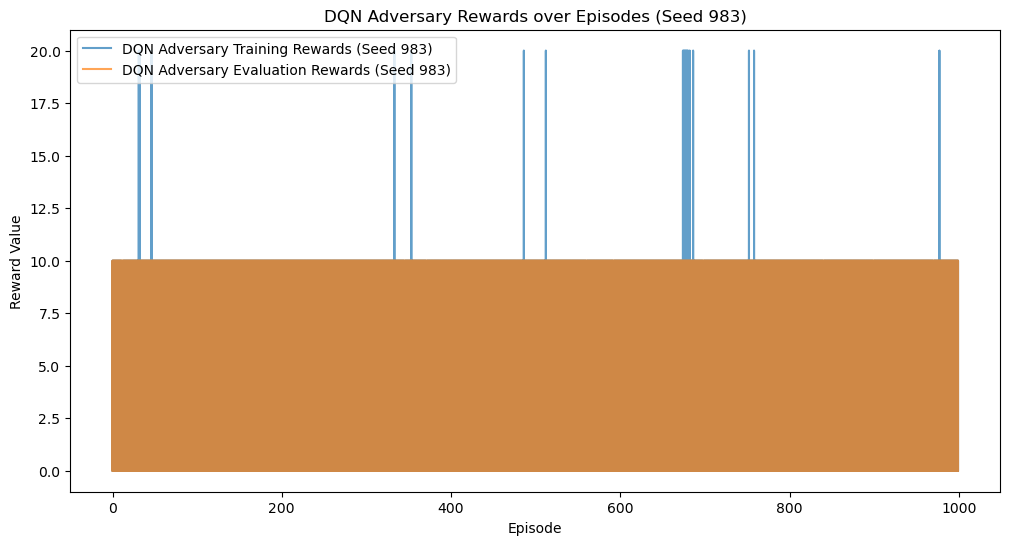

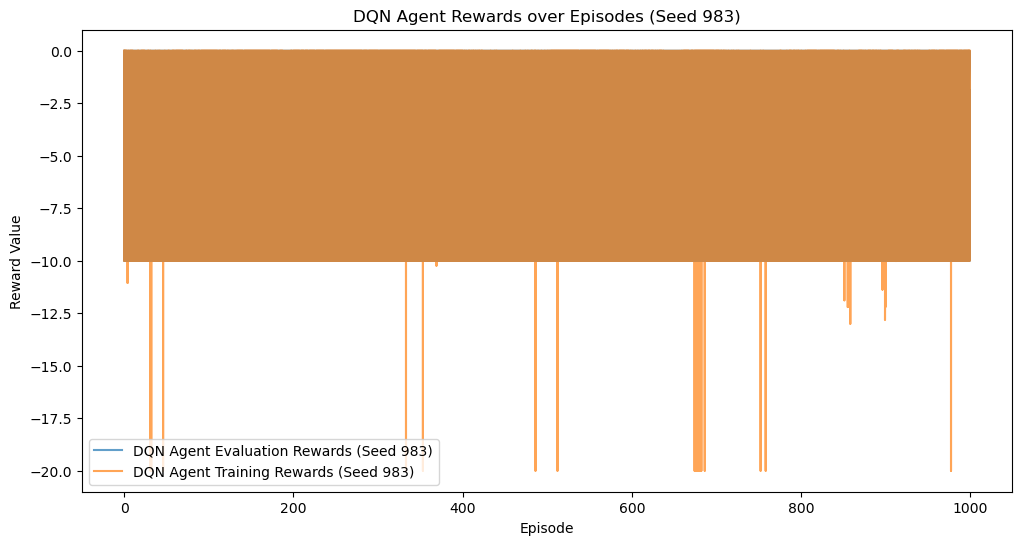

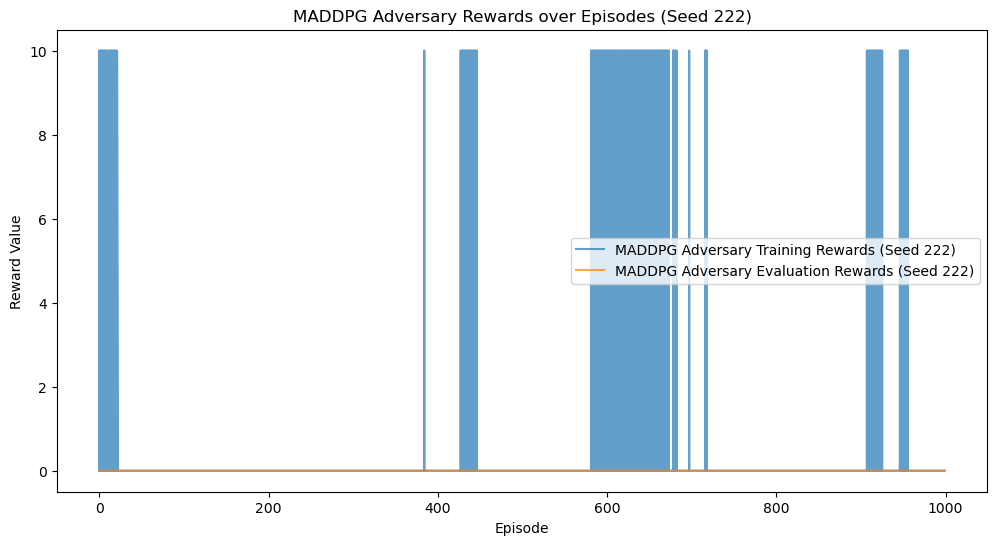

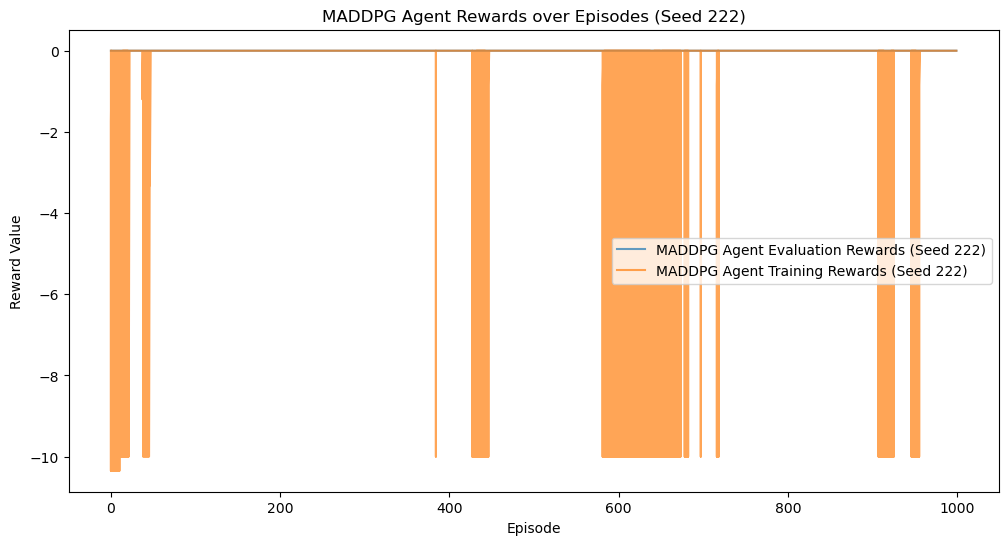

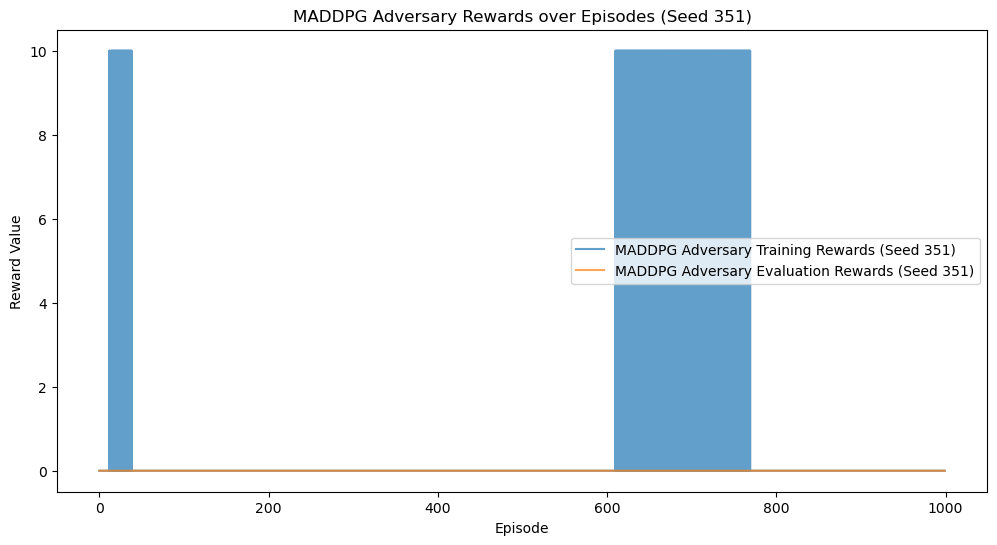

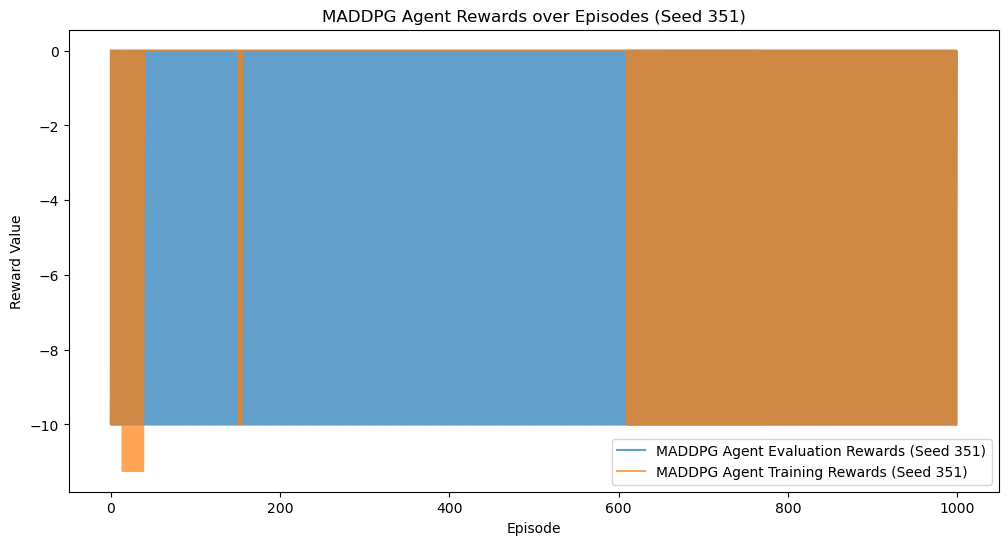

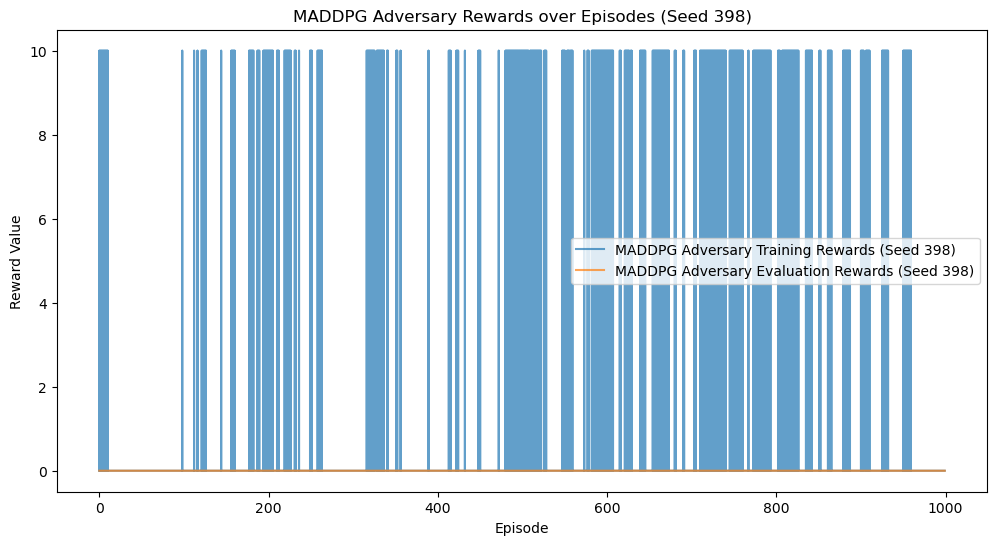

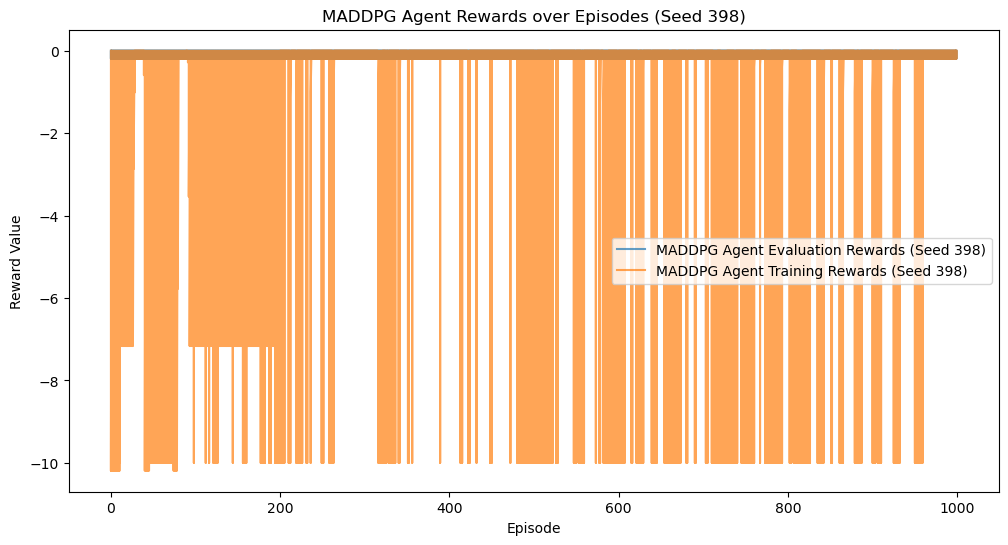

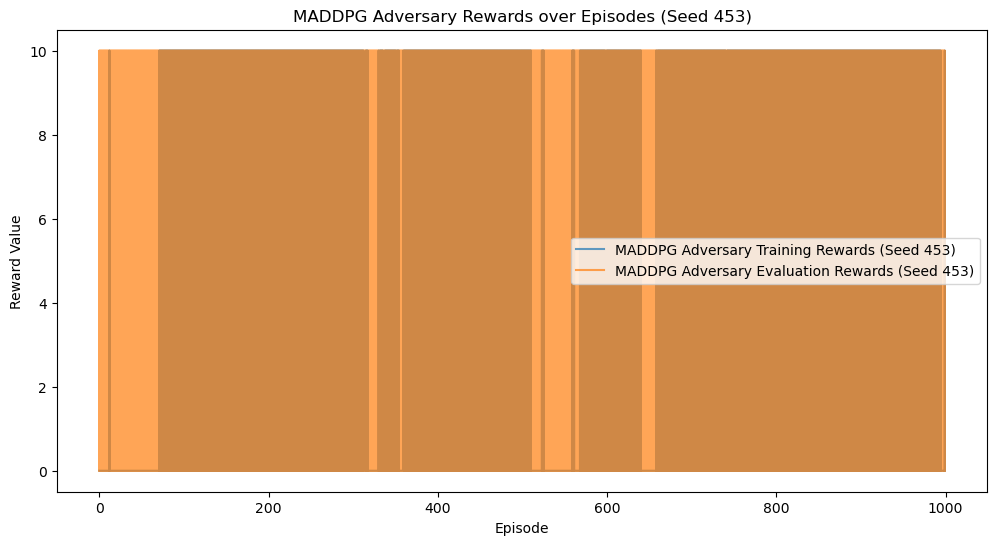

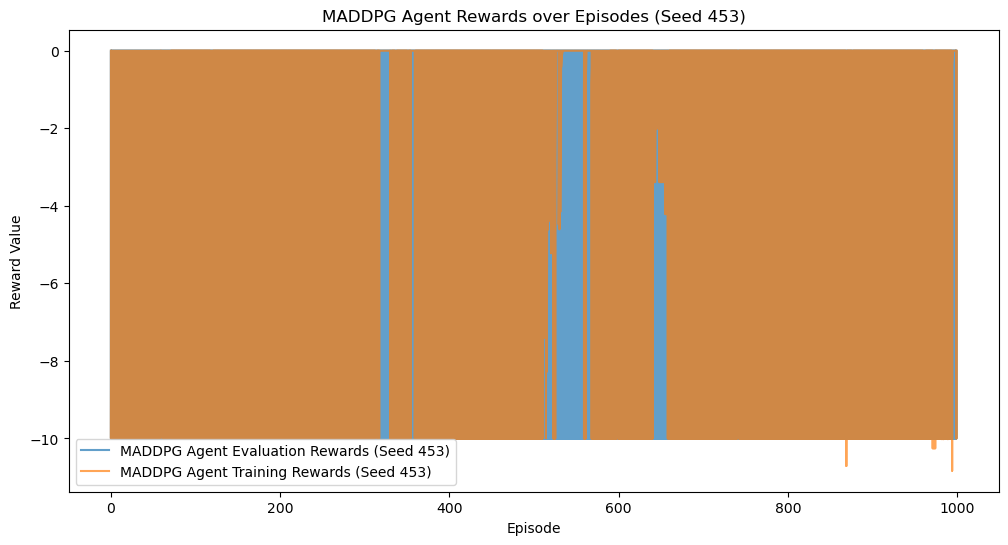

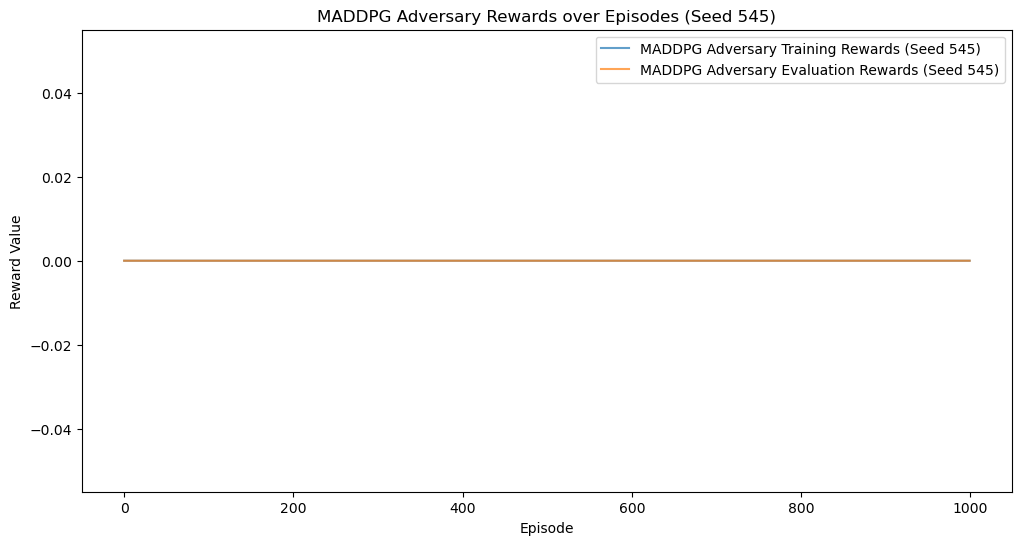

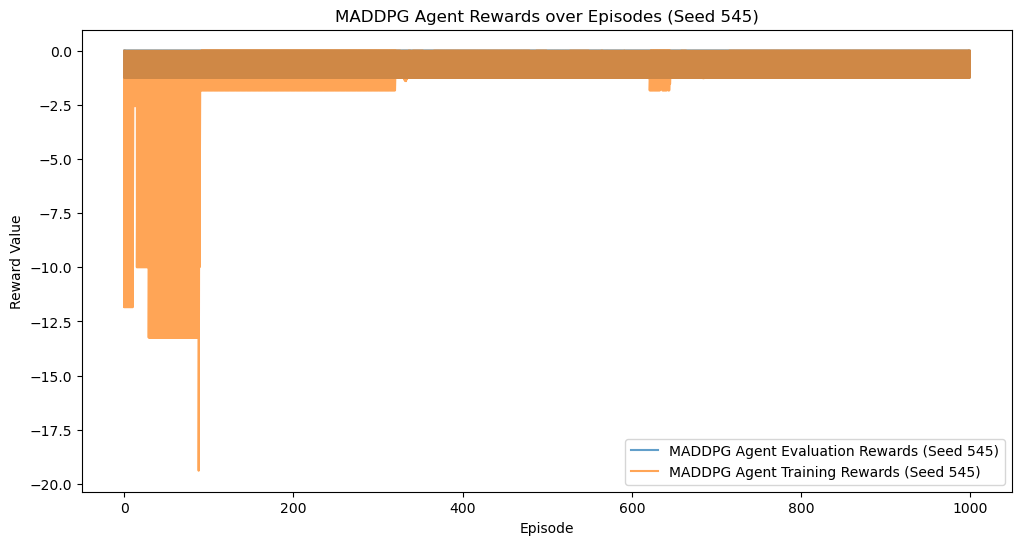

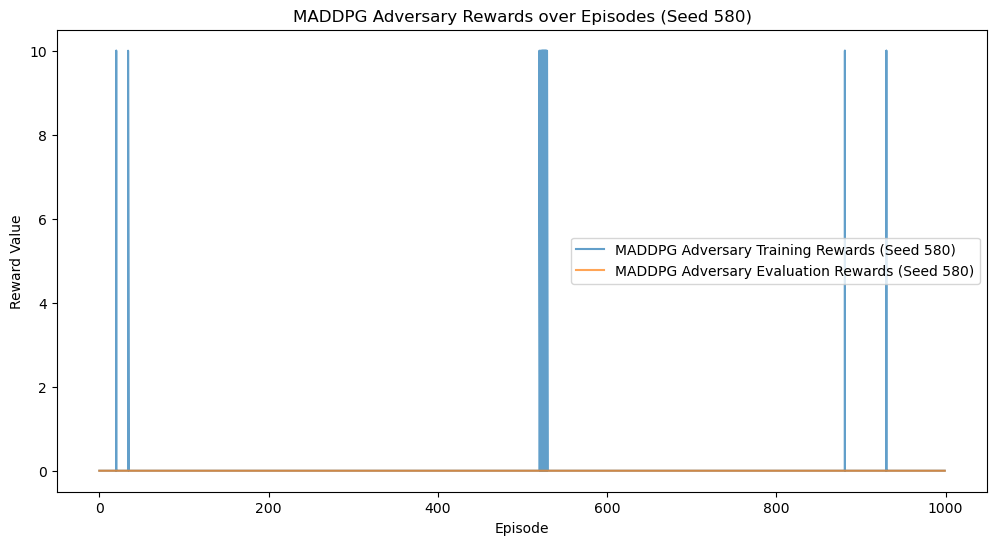

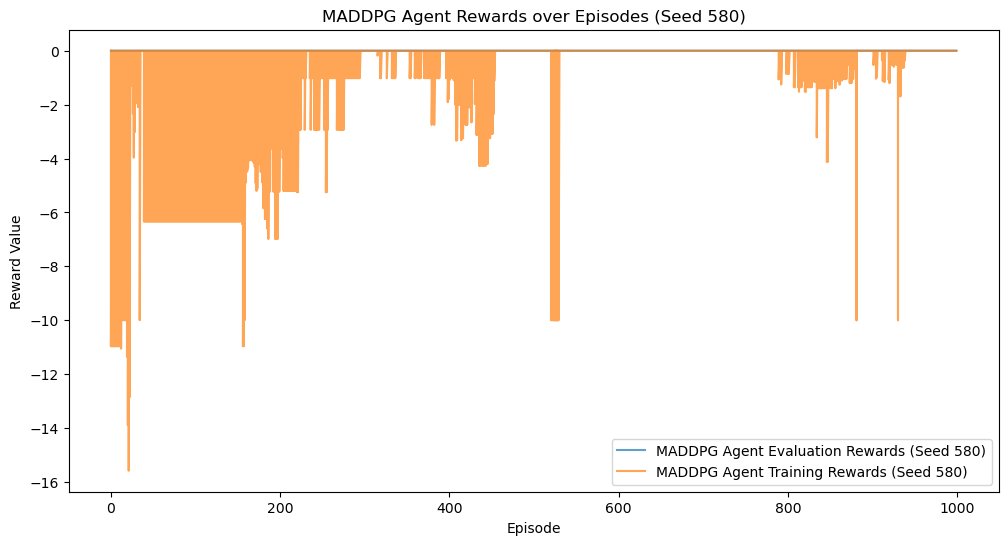

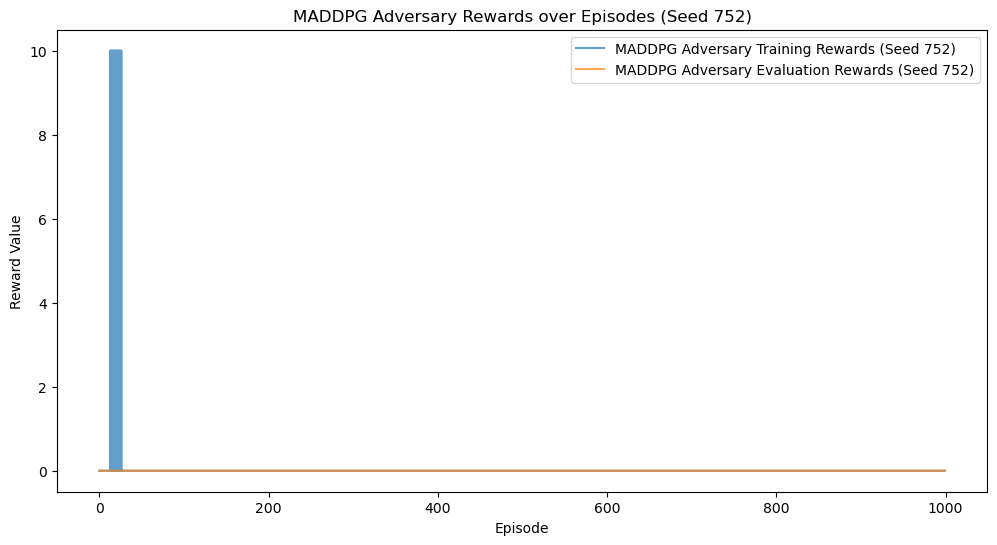

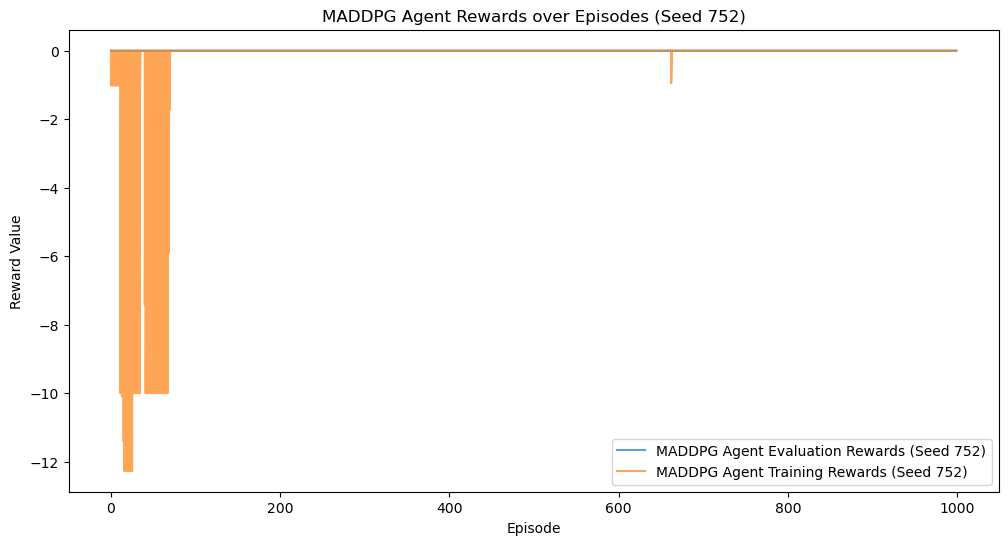

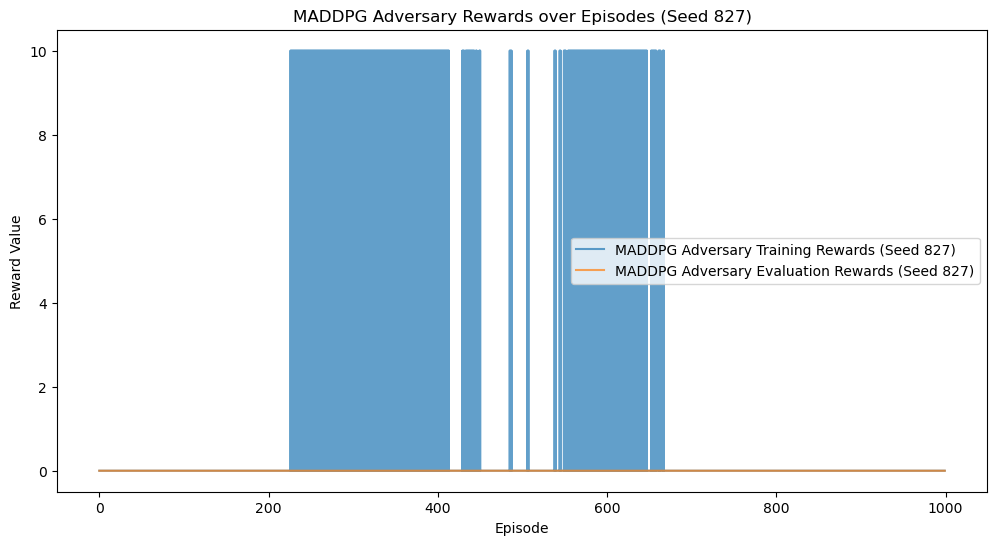

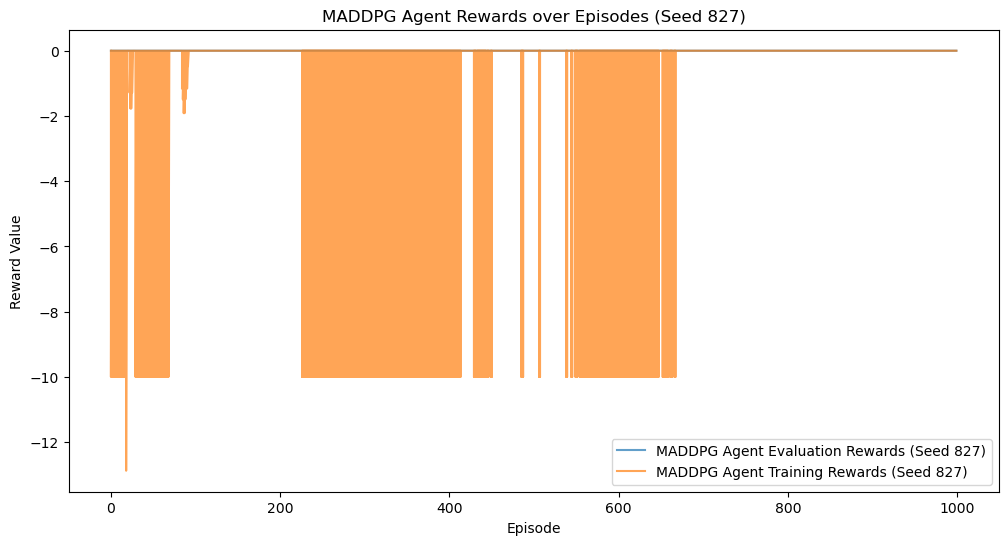

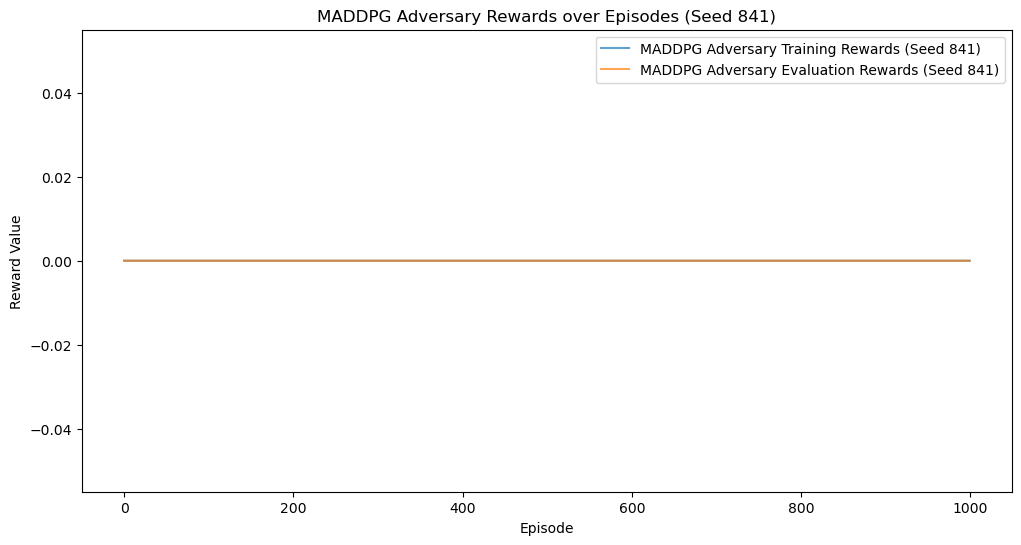

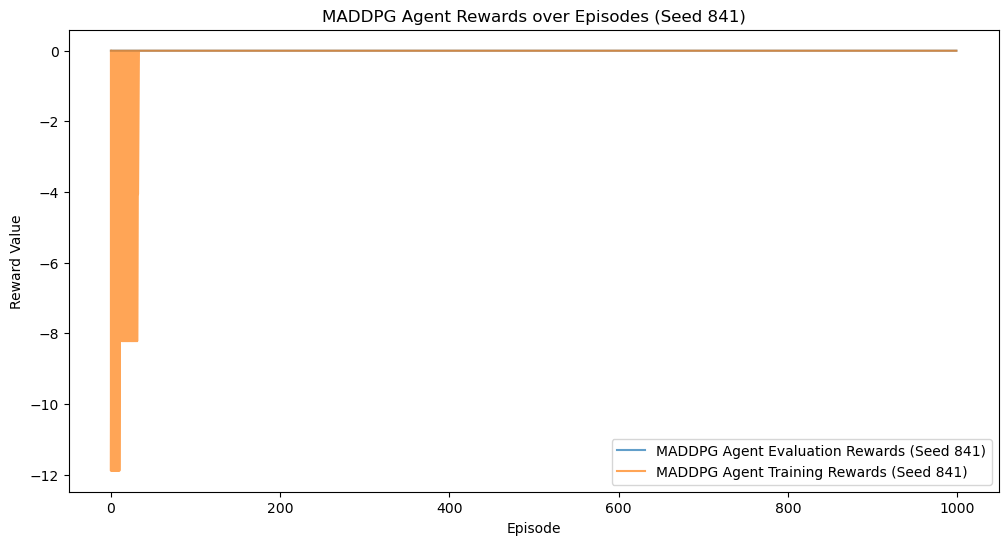

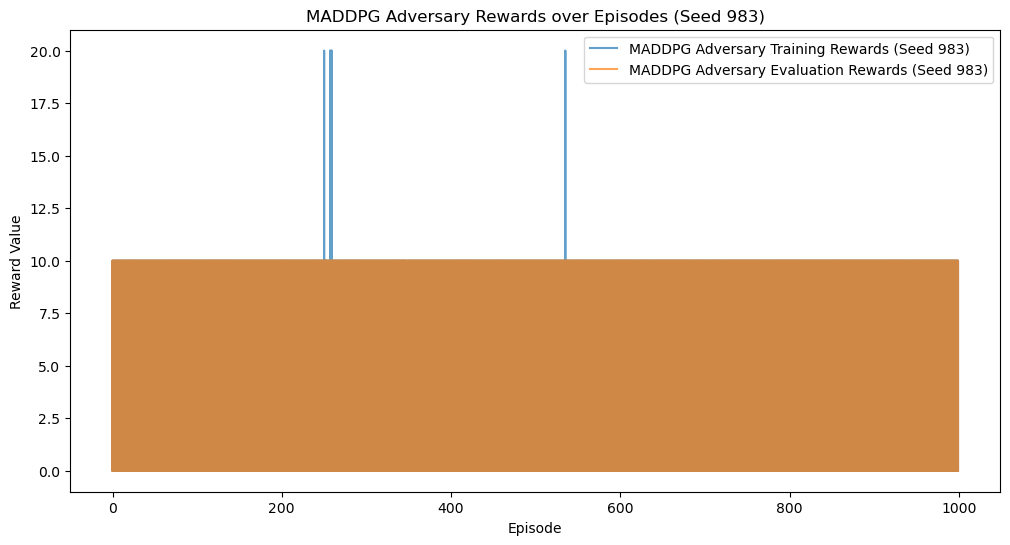

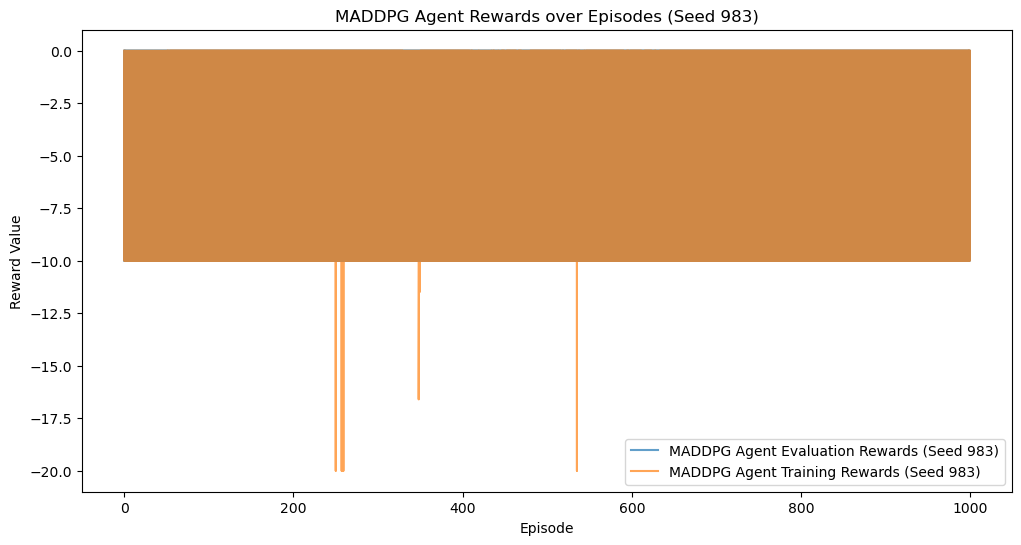

In [4]:
# [Reformatted with indexing and image output]
import os
import pandas as pd
import matplotlib.pyplot as plt

# List of seeds used in the experiments
seeds = [222, 351, 398, 453, 545, 580, 752, 827, 841, 983]  # Update this list with the seeds you employed

# Function to load data for each seed, given the directory and algorithm
def load_data_for_seed(seed, algorithm_directory):
    evaluation_file = os.path.join(algorithm_directory, f'evaluation_data_{seed}.csv')
    training_file = os.path.join(algorithm_directory, f'training_data_{seed}.csv')
    evaluation_data = pd.read_csv(evaluation_file)
    training_data = pd.read_csv(training_file)
    return evaluation_data, training_data

# Function to separate adversaries and agents
def separate_adversaries_and_agents(data):
    adversaries = data[data['Agent'].str.contains('adversary')]
    agents = data[data['Agent'].str.contains('agent')]
    return adversaries, agents

# Directories for both DQN and MADDPG algorithms
dqn_directory = '/Users/Niklas/Library/CloudStorage/OneDrive-tukl/TU KL/02_Master/10. Fachsemester/[4.5 LP] Multiagent Systems/Programming Task/Konzept/project/Results/True/data_exportDQN'  # Update this with the DQN directory path
maddpg_directory = '/Users/Niklas/Library/CloudStorage/OneDrive-tukl/TU KL/02_Master/10. Fachsemester/[4.5 LP] Multiagent Systems/Programming Task/Konzept/project/Results/True/data_exportMADDPG'  # Update this with the MADDPG directory path

# Output directory for saving plots
output_directory = 'output_plots'  # Update this with your desired output directory path
os.makedirs(output_directory, exist_ok=True)  # Create the directory if it doesn't exist

# Algorithms to compare
algorithms = {
    'DQN': dqn_directory,
    'MADDPG': maddpg_directory
}

# Loop through each algorithm and seed to process and plot data
for algorithm, algorithm_directory in algorithms.items():
    for seed in seeds:
        # Load the data for this seed
        evaluation_data, training_data = load_data_for_seed(seed, algorithm_directory)

        # Separate adversaries and agents for evaluation and training data
        evaluation_adversaries, evaluation_agents = separate_adversaries_and_agents(evaluation_data)
        training_adversaries, training_agents = separate_adversaries_and_agents(training_data)

        # Extract the 'reward' and the 'episode' columns for adversaries and agents
        evaluation_adversary_rewards = evaluation_adversaries['Reward']
        evaluation_agent_rewards = evaluation_agents['Reward']
        training_adversary_rewards = training_adversaries['Reward']
        training_agent_rewards = training_agents['Reward']

        # Use the number of episodes as x-axis
        evaluation_adversary_episodes = evaluation_adversaries['Episode']
        evaluation_agent_episodes = evaluation_agents['Episode']
        training_adversary_episodes = training_adversaries['Episode']
        training_agent_episodes = training_agents['Episode']

        # Plot for the adversary rewards
        plt.figure(figsize=(12, 6))

        # Plot for the adversary training rewards
        plt.plot(training_adversary_episodes, training_adversary_rewards,
                 label=f'{algorithm} Adversary Training Rewards (Seed {seed})', alpha=0.7)

        # Plot for the adversary evaluation rewards
        plt.plot(evaluation_adversary_episodes, evaluation_adversary_rewards,
                 label=f'{algorithm} Adversary Evaluation Rewards (Seed {seed})', alpha=0.7)

        plt.title(f'{algorithm} Adversary Rewards over Episodes (Seed {seed})')
        plt.xlabel('Episode')
        plt.ylabel('Reward Value')
        plt.legend()
        plt.show()
        
        # Save the adversary rewards plot
        plt.savefig(os.path.join(output_directory, f'{algorithm}_Adversary_Rewards_{seed}.png'))
        plt.close()  # Close the figure to free up memory

        # Plot for the agent rewards
        plt.figure(figsize=(12, 6))

        # Plot for the agent evaluation rewards
        plt.plot(evaluation_agent_episodes, evaluation_agent_rewards,
                 label=f'{algorithm} Agent Evaluation Rewards (Seed {seed})', alpha=0.7)

        # Plot for the agent training rewards
        plt.plot(training_agent_episodes, training_agent_rewards,
                 label=f'{algorithm} Agent Training Rewards (Seed {seed})', alpha=0.7)

        plt.title(f'{algorithm} Agent Rewards over Episodes (Seed {seed})')
        plt.xlabel('Episode')
        plt.ylabel('Reward Value')
        plt.legend()
        plt.show()
        
        # Save the agent rewards plot
        plt.savefig(os.path.join(output_directory, f'{algorithm}_Agent_Rewards_{seed}.png'))
        plt.close()  # Close the figure to free up memory

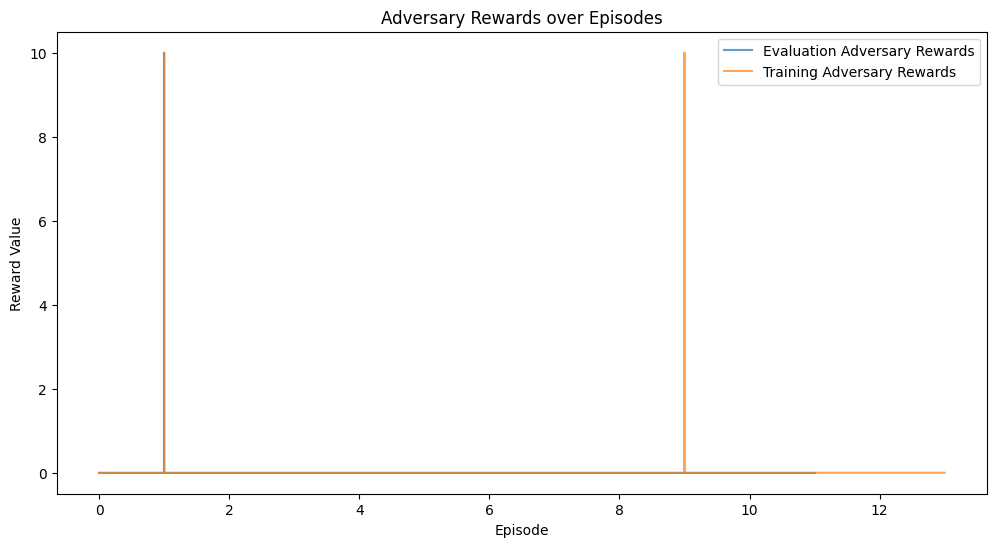

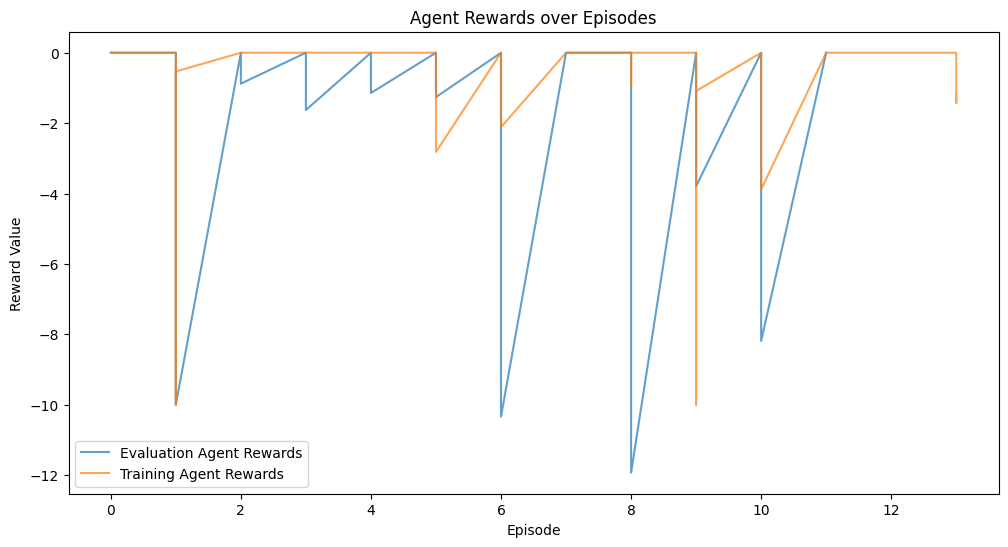

In [2]:
# [Original] Represent average rewards with episodes as time variable
import pandas as pd
import matplotlib.pyplot as plt

# Load data
evaluation_data = pd.read_csv('DQN/evaluation_data.csv')
training_data = pd.read_csv('DQN/training_data.csv')

# Filter adversaries und agents based on the agent column
def separate_adversaries_and_agents(data):
    adversaries = data[data['Agent'].str.contains('adversary')]
    agents = data[data['Agent'].str.contains('agent')]
    return adversaries, agents

evaluation_adversaries, evaluation_agents = separate_adversaries_and_agents(evaluation_data)
training_adversaries, training_agents = separate_adversaries_and_agents(training_data)

# Extract the 'reward' and the 'episode' column for adversaries and agents
evaluation_adversary_rewards = evaluation_adversaries['Reward']
evaluation_agent_rewards = evaluation_agents['Reward']
training_adversary_rewards = training_adversaries['Reward']
training_agent_rewards = training_agents['Reward']

# Use the number episodes as x-axis
evaluation_adversary_episodes = evaluation_adversaries['Episode']
evaluation_agent_episodes = evaluation_agents['Episode']
training_adversary_episodes = training_adversaries['Episode']
training_agent_episodes = training_agents['Episode']

# Plot for the adversary rewards
plt.figure(figsize=(12, 6))

# Plot for the adversary training rewards
plt.plot(training_adversary_episodes, training_adversary_rewards, label='Adversary Training Rewards', alpha=0.7)

# Plot for the adversary evaluation rewards
plt.plot(evaluation_adversary_episodes, evaluation_adversary_rewards, label='Adversary Evaluation Rewards', alpha=0.7)

plt.title('Adversary Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward Value')
plt.legend()
plt.show()

# Plot for the agent rewards
plt.figure(figsize=(12, 6))

# Plot for the agent evaluation rewards
plt.plot(evaluation_agent_episodes, evaluation_agent_rewards, label='Agent Evaluation Rewards', alpha=0.7)

# Plot for the agent training rewards
plt.plot(training_agent_episodes, training_agent_rewards, label='Agent Training Rewards', alpha=0.7)

plt.title('Agent Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Reward Value')
plt.legend()
plt.show()